In [0]:
#thank you Quantecon, Thomas J.Sargent and John Stachurski
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class Solow:
  r"""
  Implement the Solow Growth model with update rule

    k_{t+1}=[s z k^alfa_t] + (1 - gamma)k_t / (1+n)
    """
  def __init__(self, n=0.05, #population growth rate
               s=0.25, #saving rate
               gamma=0.1, #depreciation rate
               alfa=0.3, #share of labor
               z=2.0, #productivity
               k=1.0): #current capital stock
    self.n,self.s,self.gamma,self.alfa,self.z,self.k=n,s,gamma,alfa,z,k
  
  def h(self):
    n,s,gamma,alfa,z = self.n,self.s,self.gamma,self.alfa,self.z
    return (s*z*self.k**alfa +(1-gamma)*self.k)/(1+n)
  def update(self):
    self.k = self.h()
  
  def steady_state(self):
    n,s,gamma,alfa,z = self.n,self.s,self.gamma,self.alfa,self.z
    return ((s*z)/(n+gamma))**(1/(1-alfa))
  
  def generate_sequence(self,t):
    path=[]
    for i in range(t):
      path.append(self.k)
      self.update()
    return path

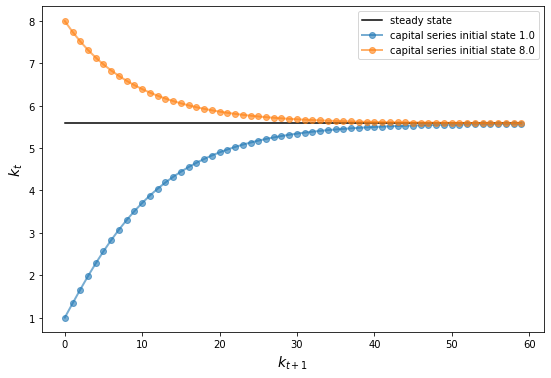

In [14]:
s1=Solow()
s2=Solow(k=8.0)

T=60
fig, ax=plt.subplots(figsize=(9,6))

ax.plot([s1.steady_state()]*T, 'k-', label='steady state')

for s in s1, s2:
  lb = f'capital series initial state {s.k}'
  ax.plot(s.generate_sequence(T), 'o-', lw=2, alpha=0.6, label=lb)

ax.set_xlabel('$k_{t+1}$', fontsize=14)
ax.set_ylabel('$k_t$', fontsize=14)
ax.legend()
plt.show()